<a href="https://colab.research.google.com/github/soooo11/bandit-reserch/blob/main/best_arm_identification_with_fixed_condition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

真値u= [0.90643441 0.87485462 0.84455697 0.79541052 0.7784133  0.71070121
 0.70128045 0.69170307 0.69161698 0.68970974 0.53988984 0.45184157
 0.19766185 0.1747789  0.0079806 ]
KL(u1|u2): 0.004932895928522869
KL(u1|u3): 0.016595341066852398
KL(u1|u4): 0.04523464762264484
KL(u1|u5): 0.057346969908908224
KL(u1|u6): 0.11488860395593757
KL(u1|u7): 0.12398594613831093
KL(u1|u8): 0.13349765741853686
KL(u1|u9): 0.1335843533868785
KL(u1|u10): 0.13551055907444204
KL(u1|u11): 0.3206406451243047
KL(u1|u12): 0.46563316373518693
KL(u1|u13): 1.1794041306613037
KL(u1|u14): 1.2882970354075365
KL(u1|u15): 4.068789598804241
I_0.29561264256340425(u1|u2): 0.0010514058161645765
I_0.6163431014076844(u1|u3): 0.004263640707719455
I_0.8607648749409522(u1|u4): 0.006470822730703543
I_0.32285537162032063(u1|u5): 0.01331663898388269
I_0.5891516448840691(u1|u6): 0.03195449405330639
I_0.6231662246131606(u1|u7): 0.0338618518846299
I_0.7733922349643455(u1|u8): 0.02869887281584647
I_0.21565997439810547(u1|u9): 0.023622234

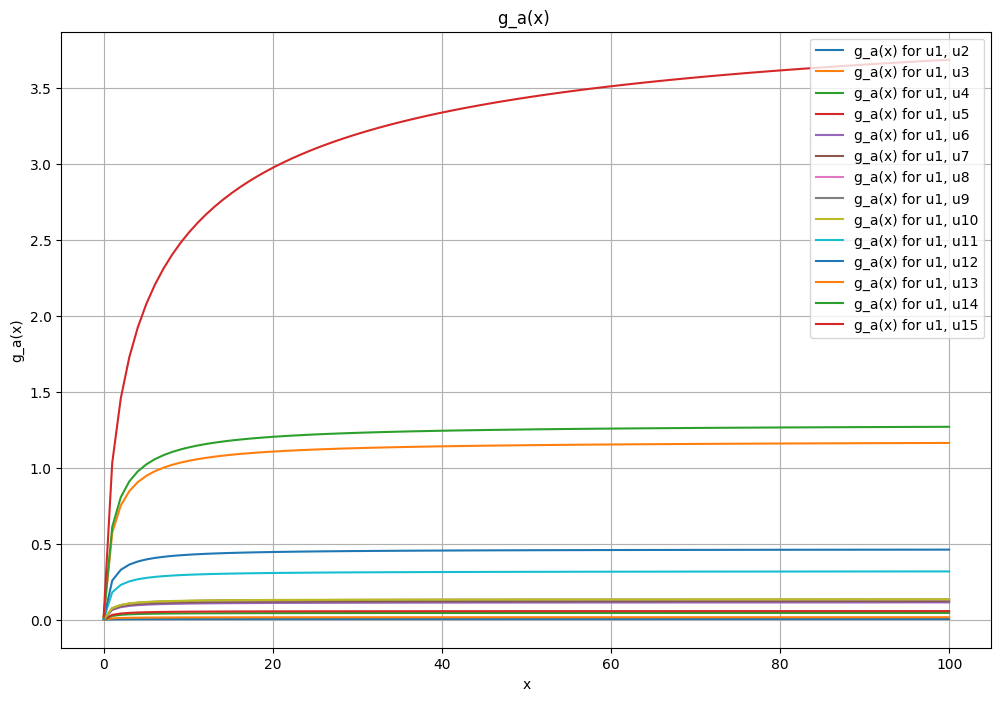

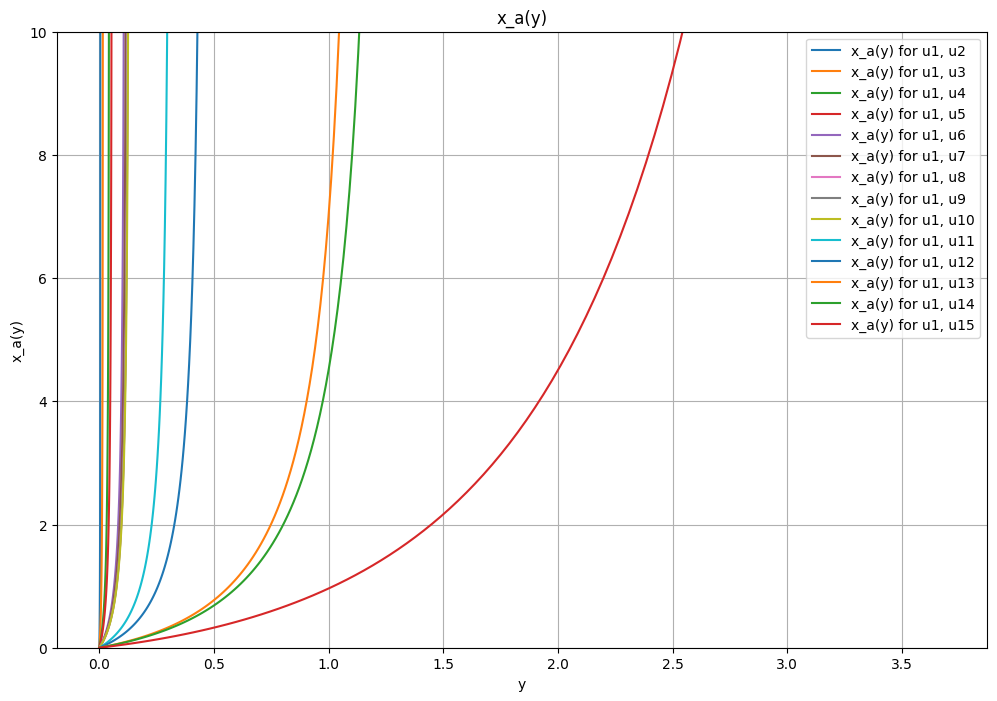

y*: 0.002494409397876914
F_u(y*) = 1.0000000008130063


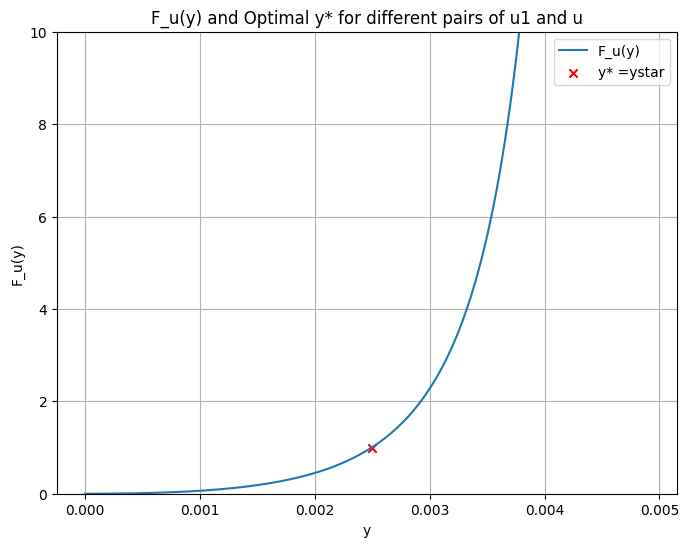

w_a for u2 = 0.4156456949698371
w_a for u3 = 0.06766847105165366
w_a for u4 = 0.0208004036394201
w_a for u5 = 0.01590278072061662
w_a for u6 = 0.007336325036642515
w_a for u7 = 0.006747279998488375
w_a for u8 = 0.0062227410158861496
w_a for u9 = 0.006218326685926771
w_a for u10 = 0.00612180523288789
w_a for u11 = 0.0024523594519387857
w_a for u12 = 0.0016934254757680393
w_a for u13 = 0.0007761742038734384
w_a for u14 = 0.0007319360884332307
w_a for u15 = 0.0004786366333332589


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#二分法（方程式の関数項、探索区間の左端、探索区間の右端、誤差範囲、最大反復回数）
def bisection(func_f, x_min, x_max, error=1e-10, max_loop=100):
    #初期値を表示
    num_calc = 0  #計算回数


    #中間値の定理の条件を満たすか調べる
    if(0.0 < func_f(x_min)*func_f(x_max)):

        quit()

    #ずっと繰り返す
    while(True):
        #新たな中間値の計算
        x_mid = (x_max +x_min)/2.0

        #探索区間を更新
        if (0.0 < func_f(x_mid)*func_f(x_max)):  #中間と右端の値が同じの時
            x_max = x_mid  #右端を更新
        else:  #中間と左端の値が同じの時
            x_min = x_mid  #左端を更新

        #「誤差範囲が一定値以下」または「計算回数が一定値以上」ならば終了
        if((x_max-x_min <= error) or max_loop <= num_calc):
            break

    return x_mid


# armの数K を設定する
K = 15

# uの 昇順のリスト を生成する
u = np.random.rand(K)
u = np.sort(u)[::-1]


# 結果の表示
print("真値u=",u)

#KL距離の定義(1パラメータ)
def kl_d(u1, uk):
    return u1 * np.log(u1 / uk) + (1 - u1) * np.log((1 - u1) / (1 - uk))

#KL距離の表示
u1 = u[0]
for i in range(1, K):
    uk = u[i]
    result = kl_d(u1, uk)
    print(f"KL(u1|u{i+1}):", result)


# I_alpha距離の定義
def I_alpha(alpha, u1, uk):
    alpha = np.clip(alpha, 0, 1)
    return alpha * kl_d(u1, alpha * u1 + (1 - alpha) * uk) + (1 - alpha) * kl_d(uk, alpha * u1 + (1 - alpha) * uk)

# I_alpha距離の表示
u1 = u[0]
for i in range(1, K):
    uk = u[i]
    alpha = np.random.rand()  # 0 から 1 のランダムな alpha を生成する例
    result = I_alpha(alpha, u1, uk)
    print(f"I_{alpha}(u1|u{i+1}):", result)

# g_a(x)の定義
def g_a(x, u1, uk):
    alpha = 1 / (1 + x)
    return (1 + x) * I_alpha(alpha, u1, uk)

# x_a(y)の定義
def x_a(y, u1, uk):
    def func(x):
        return g_a(x, u1, uk) - y

    #探索区間の終点を探す
    x=1
    while func(x)<=0:
          x=2*x

    # 初期の区間 [a, b] を調整して二分法
    try:
        result = bisection(func, 0,x, error=1e-10, max_loop=100)
    except ValueError:
        result = np.nan  # 二分法が失敗した場合は NaN を返します
    return result

# xの範囲を設定
x_values = np.linspace(0.01, 100, 100)
# g_a(x)の計算と図示
plt.figure(figsize=(12, 8))
for i in range(1, K):
    u1 = u[0]
    uk = u[i]
    g_values = [g_a(x, u1, uk) for x in x_values]
    plt.plot(x_values, g_values, label=f'g_a(x) for u1, u{i+1}')

plt.xlabel('x')
plt.ylabel('g_a(x)')
plt.title('g_a(x) ')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# g_a(x)の値域を取得と yの範囲を設定
for i in range(1, K):
    u1 = u[0]
    uk = u[i]
    g_values = np.array([g_a(x, u1, u[i]) for x in x_values])
    y_min, y_max = np.min(g_values), np.max(g_values)
    y_values = np.linspace(0, y_max, 100)

# x_a(y)の計算と図示
plt.figure(figsize=(12, 8))
for i in range(1, K):
    u1 = u[0]
    uk = u[i]
    g_values = np.array([g_a(x, u1, uk) for x in x_values])
    y_min, y_max = np.min(g_values), np.max(g_values)
    y_values = np.linspace(0, y_max, 100)
    x_values = [x_a(y, u1, uk) for y in y_values]
    plt.plot(y_values, x_values, label=f'x_a(y) for u1, u{i+1}')

plt.xlabel('y')
plt.ylabel('x_a(y)')
plt.title('x_a(y)')
plt.legend(loc='upper right')
plt.grid(True)
plt.ylim(0, 10)
plt.show()

# F_u(y) の定義
def F_u(y, u1, u):
    sum_terms = 0
    for i in range(1, K):
        u1 = u[0]
        uk = u[i]  # mu_list の先頭は u1 なので除外します
        xa_y = x_a(y, u1, u[i])
        child = kl_d(u1, (u1 + xa_y * u[i]) / (1 + xa_y))
        mother = kl_d(u[i], (u1 + xa_y * u[i]) / (1 + xa_y))
        sum_terms += child / mother
    return sum_terms

# y* の計算
def y_star(u1, u):
    def func1(y):
        return F_u(y, u1, u) - 1.0

    #探索区間の終点を探す
    x=max(0,kl_d(u1, u[1])-1)
    while func1(x)<=0:
          x=(kl_d(u1, u[1])+x)/2

    # 二分法でF_u(y)-1=0となるyを求める
    try:
        y_optimal = bisection(func1, 0,x, error=1e-10, max_loop=100)  # 誤差許容値を設定
        Fu_optimal = F_u(y_optimal, u1, u)
        print('y*:',y_optimal)
        print('F_u(y*) =' ,Fu_optimal)
        return y_optimal
    except ValueError:
        print("Optimal y* not found.")
        return np.nan

# F_u(y)の図示
y_values = np.linspace(0, kl_d(u1, u[1]), 200, endpoint=False)
F_values = [F_u(y, u1, u) for y in y_values]
plt.figure(figsize=(8, 6))
plt.plot(y_values, F_values, label="F_u(y)")

# y* を計算
ystar = y_star(u1, u)
plt.scatter([ystar],F_u(ystar, u1, u) , color='red', label="y* =ystar", marker='x')
plt.title("F_u(y) and Optimal y* for different pairs of u1 and u")
plt.xlabel("y")
plt.ylabel("F_u(y)")
plt.legend()
plt.grid(True)
plt.ylim(0, 10)
plt.show()

#waの計算
def w_a(ystar, u1, u):
    sum_terms = 0
    child = 0
    mother = 0
    child=[1]
    for i in range(1, K):
        uk = u[i]
        xa_ystar = x_a(ystar, u1, uk)
        if np.isnan(xa_ystar):
            continue
        child.append(xa_ystar)  # childにxa_ystarを格納

    return np.array(child)/ np.sum(child)

# u の各要素に対する w_a を計算して表示
for i in range(1, K):
    u1 = u[0]
    uk = u[i]
    result = w_a(ystar, u1, u)[i]
    print(f"w_a for u{i+1} =", result)

真値u= [0.26759431 0.08118432 0.39983314 0.15603451 0.90225693 0.23591993
 0.60728415 0.63510516 0.4192002  0.24134988 0.64207401 0.23489562
 0.9256298  0.95985399 0.9078093 ]
KL(max_u|u1): 1.1094538264134877
KL(max_u|u2): 2.245216456206907
KL(max_u|u3): 0.7319943547189294
KL(max_u|u4): 1.6215023692766577
KL(max_u|u5): 0.02367485189211635
KL(max_u|u6): 1.2286761166712967
KL(max_u|u7): 0.3478506545475922
KL(max_u|u8): 0.3078049600307346
KL(max_u|u9): 0.6879088783457185
KL(max_u|u10): 1.2071207969417508
KL(max_u|u11): 0.29810422044836615
KL(max_u|u12): 1.232798894333475
KL(max_u|u13): 0.010097924343197614
KL(max_u|max_u): 0
KL(max_u|u15): 0.02013400419252076
I_0.22115803805508327(max_u|u1): 0.1908785462682099
I_0.23004192751328334(max_u|u2): 0.34045576968302205
I_0.3124163278236707(max_u|u3): 0.16659850378205063
I_0.6198824288405345(max_u|u4): 0.37574148468920243
I_0.9188649814357182(max_u|u5): 0.002253170968237803
I_0.9939380303463773(max_u|u6): 0.011397552472795924
I_0.03785894510447918(

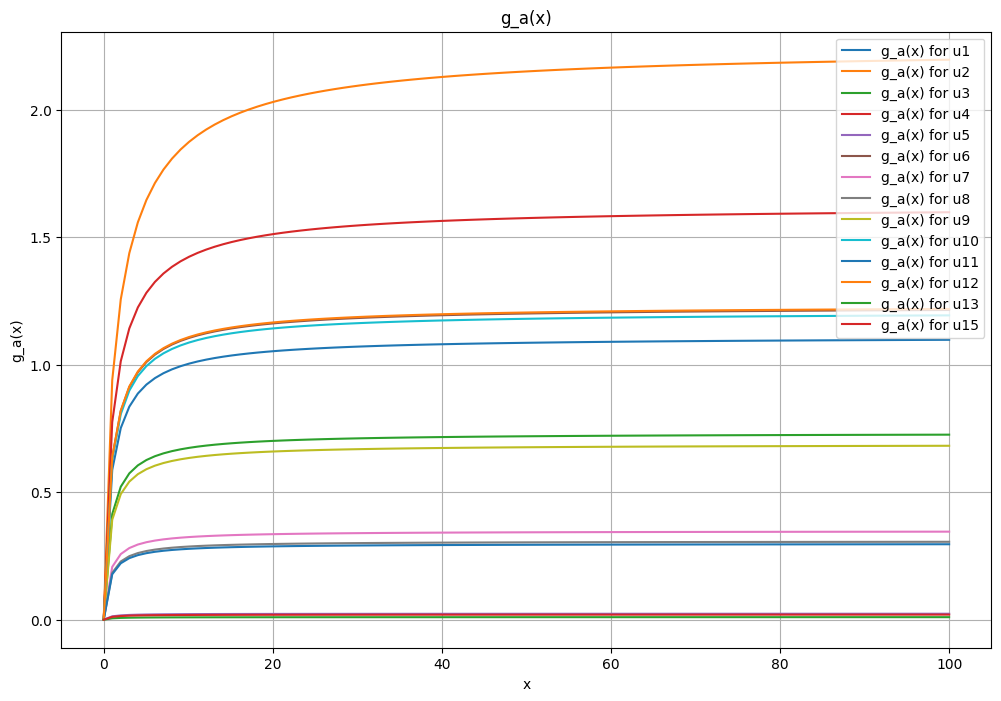

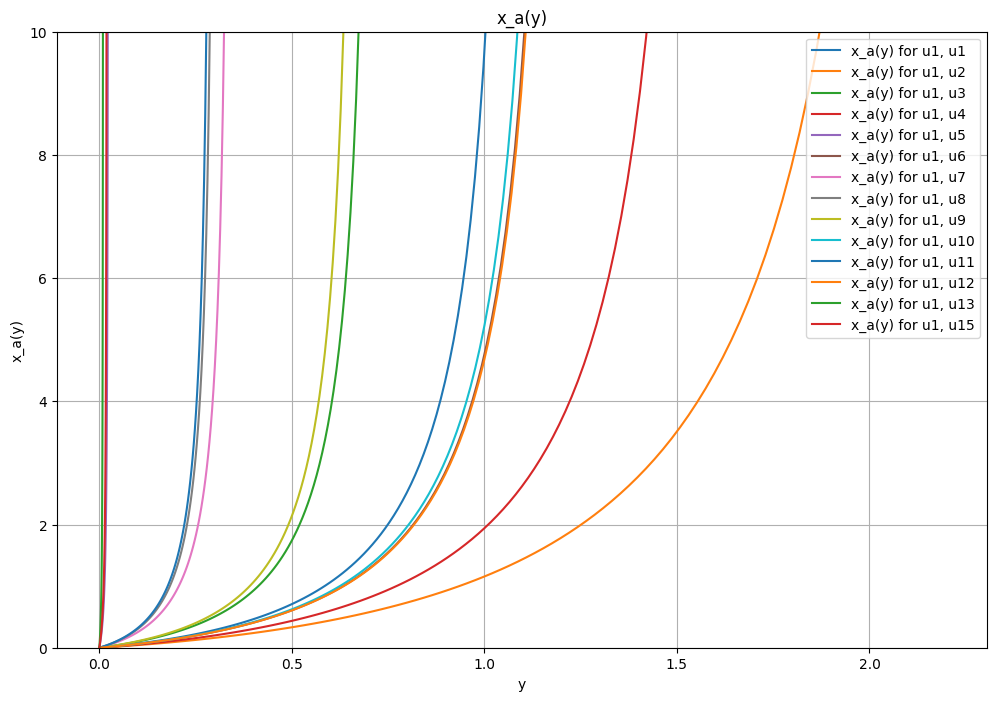

KeyboardInterrupt: 

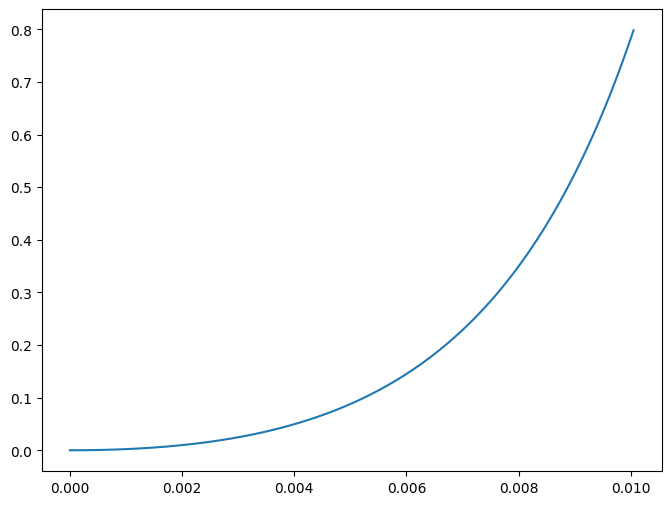

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#二分法（方程式の関数項、探索区間の左端、探索区間の右端、誤差範囲、最大反復回数）
def bisection(func_f, x_min, x_max, error=1e-10, max_loop=100):
    #初期値を表示
    num_calc = 0  #計算回数


    #中間値の定理の条件を満たすか調べる
    if(0.0 < func_f(x_min)*func_f(x_max)):

        quit()

    #ずっと繰り返す
    while(True):
        #新たな中間値の計算
        x_mid = (x_max +x_min)/2.0

        #探索区間を更新
        if (0.0 < func_f(x_mid)*func_f(x_max)):  #中間と右端の値が同じの時
            x_max = x_mid  #右端を更新
        else:  #中間と左端の値が同じの時
            x_min = x_mid  #左端を更新

        #「誤差範囲が一定値以下」または「計算回数が一定値以上」ならば終了
        if((x_max-x_min <= error) or max_loop <= num_calc):
            break

    return x_mid


# armの数K を設定する
K = 15

# uの 昇順のリスト を生成する
u = np.random.rand(K)

#uの中で最も大きいarmを定義する
max_u=max(u)

#昇順にして2番目に大きい値を取り出す(y*の端点を探すときに使う)
u_sort=np.sort(u)[::-1]
u_second=u_sort[1]

# 結果の表示
print("真値u=",u)

#KL距離の定義(1パラメータ)
def kl_d(max_u, uk):
    return max_u * np.log(max_u / uk) + (1 - max_u) * np.log((1 - max_u) / (1 - uk))

#KL距離の表示
for i in range(len(u)):
    if max_u!=u[i]:
       uk = u[i]
       result = kl_d(max_u, uk)
       print(f"KL(max_u|u{i+1}):", result)
    else:
       result=0
       print("KL(max_u|max_u):",result)


# I_alpha距離の定義
def I_alpha(alpha, max_u, uk):
    alpha = np.clip(alpha, 0, 1)
    return alpha * kl_d(max_u, alpha * max_u + (1 - alpha) * uk) + (1 - alpha) * kl_d(uk, alpha * max_u + (1 - alpha) * uk)


# I_alpha距離の表示
for i in range(len(u)):
    if max_u!=u[i]:
       uk = u[i]
       alpha = np.random.rand()  # 0 から 1 のランダムな alpha を生成する例
       print(f"I_{alpha}(max_u|u{i+1}):",  I_alpha(alpha, max_u, uk))
    else :
       uk=max_u
       alpha = np.random.rand()  # 0 から 1 のランダムな alpha を生成する例
       print(f"I_{alpha}(max_u|u{i+1}):", I_alpha(alpha, max_u, uk))

# g_a(x)の定義
def g_a(x, max_u, uk):
    alpha = 1 / (1 + x)
    return (1 + x) * I_alpha(alpha, max_u, uk)

x_values = np.linspace(0, 100, 100)
# g_a(x)の計算と図示
plt.figure(figsize=(12, 8))
for i in range(len(u)):
    if max_u!=u[i]:
       uk = u[i]
       g_values = [g_a(x, max_u, uk) for x in x_values]
       plt.plot(x_values, g_values, label=f'g_a(x) for u{i+1}')
plt.xlabel('x')
plt.ylabel('g_a(x)')
plt.title('g_a(x)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# x_a(y)の定義
def x_a(y, max_u, uk):
    def func(x):
        return g_a(x, max_u, uk) - y

    #探索区間の終点を探す
    x=1
    while func(x)<=0:
          x=2*x

    # 初期の区間 [a, b] を調整して二分法
    try:
        result = bisection(func, 0,x, error=1e-10, max_loop=100)
    except ValueError:
        result = np.nan  # 二分法が失敗した場合は NaN を返します
    return result

# g_a(x)の値域を取得と yの範囲を設定
# x_a(y)の計算と図示
plt.figure(figsize=(12, 8))
for i in range(0, K):
    if max_u!=u[i]:
       uk = u[i]
       g_values = np.array([g_a(x, max_u, uk) for x in x_values])
       y_min, y_max = np.min(g_values), np.max(g_values)
       y_values = np.linspace(0, y_max, 100)
       x_values = [x_a(y, max_u, uk)for y in y_values]
       plt.plot(y_values, x_values, label=f'x_a(y) for u1, u{i+1}')
plt.xlabel('y')
plt.ylabel('x_a(y)')
plt.title('x_a(y)')
plt.legend(loc='upper right')
plt.grid(True)
plt.ylim(0, 10)
plt.show()

# F_u(y) の定義
def F_u(y, max_u, uk):
    sum_terms = 0
    for i in range(0, K):
        if max_u!=u[i]:
           uk = u[i]  # mu_list の先頭は u1 なので除外します
           xa_y = x_a(y, max_u, u[i])
           child = kl_d(max_u, (max_u + xa_y * u[i]) / (1 + xa_y))
           mother = kl_d(u[i], (max_u + xa_y * u[i]) / (1 + xa_y))
           sum_terms += child / mother
        else:
           sum_terms = 0
    return sum_terms

# y* の計算
def y_star(max_u, u):
    def func1(y):
        return F_u(y, max_u, uk) - 1.0

    #探索区間の終点を探す
    x=max(0,kl_d(max_u, u_second)-1)
    while func1(x)<=0:
          x=(kl_d(max_u, u_second)+x)/2


    # 二分法でF_u(y)-1=0となるyを求める
    try:
        y_optimal = bisection(func1, 0,x, error=1e-10, max_loop=100)  # 誤差許容値を設定
        Fu_optimal = F_u(y_optimal, max_u, uk)
        print('y*:',y_optimal)
        print('F_u(y*) =' ,Fu_optimal)
        return y_optimal
    except ValueError:
        print("Optimal y* not found.")
        return np.nan

# F_u(y)の図示
y_values = np.linspace(0, kl_d(max_u, u_second), 200, endpoint=False)
F_values = [F_u(y,max_u , uk) for y in y_values]
plt.figure(figsize=(8, 6))
plt.plot(y_values, F_values, label="F_u(y)")

# y* を計算
ystar = y_star(max_u, uk)
plt.scatter([ystar],F_u(ystar, max_u, uk) , color='red', label="y* =ystar", marker='x')
plt.title("F_u(y) and Optimal y* for different pairs of u1 and u")
plt.xlabel("y")
plt.ylabel("F_u(y)")
plt.legend()
plt.grid(True)
plt.ylim(0, 10)
plt.show()

#waの計算
def w_a(ystar, max_u, uk):
    mother = 0
    child=[]
    for i in range(0, K):
        if max_u!=u[i]:
          uk = u[i]
          xa_ystar = x_a(ystar, max_u, uk)
          if np.isnan(xa_ystar):
             continue
          child.append(xa_ystar)  # childにxa_ystarを格納
        else:
          uk=max_u
          child.append(1)
    return np.array(child)/ np.sum(child)

# u の各要素に対する w_a を計算して表示
for i in range(0, K):
    uk = u[i]
    result = w_a(ystar, max_u, uk)[i]
    print(f"w_a for u{i+1} =", result)

#waの和
def wanosum(ystar,u1,uk):
    wa=[]
    for i in range(0, K):
        uk = u[i]
        result1 = w_a(ystar, max_u, u)[i]
        wa.append(result1)

    return np.sum(wa)

print("waの和",wanosum(ystar,max_u,uk))



---



# **W*の計算(改良版)**

---



In [1]:
import numpy as np
import matplotlib.pyplot as plt

#二分法（方程式の関数項、探索区間の左端、探索区間の右端、誤差範囲、最大反復回数）
def bisection(func_f, x_min, x_max, error=1e-10, max_loop=100):
    #初期値を表示
    num_calc = 0  #計算回数


    #中間値の定理の条件を満たすか調べる
    if(0.0 < func_f(x_min)*func_f(x_max)):

        quit()

    #ずっと繰り返す
    while(True):
        #新たな中間値の計算
        x_mid = (x_max +x_min)/2.0

        #探索区間を更新
        if (0.0 < func_f(x_mid)*func_f(x_max)):  #中間と右端の値が同じの時
            x_max = x_mid  #右端を更新
        else:  #中間と左端の値が同じの時
            x_min = x_mid  #左端を更新

        #「誤差範囲が一定値以下」または「計算回数が一定値以上」ならば終了
        if((x_max-x_min <= error) or max_loop <= num_calc):
            break

    return x_mid

# armの数K を設定する
K = 5

# uの 昇順のリスト を生成する
u = np.random.rand(K)

# uの中で最も大きいarmを定義する
max_u = max(u)

# 昇順にして2番目に大きい値を取り出す(y*の端点を探すときに使う)
u_sort = np.sort(u)[::-1]
u_second = u_sort[1]

# 結果の表示
print("真値u=", u)

# KL距離の定義(1パラメータ)
def kl_d(max_u, uk):
    if max_u != uk:
        return max_u * np.log(max_u / uk) + (1 - max_u) * np.log((1 - max_u) / (1 - uk))
    else:
        return 0

# 全てのukに対してKL距離を計算して表示する
kl_distances = [kl_d(max_u, u[i]) for i in range(len(u))]
print("KL距離=", kl_distances)


真値u= [0.43573149 0.11334955 0.01836644 0.65318137 0.35840785]
KL距離= [0.09562009602081137, 0.8184268821463867, 1.9718903564216466, 0, 0.1786827451190325]


In [13]:
# I_alpha距離の定義
def I_alpha(alpha, max_u, uk):
    if max_u!=uk:
       return alpha * kl_d(max_u, alpha * max_u + (1 - alpha) * uk) + (1 - alpha) * kl_d(uk, alpha * max_u + (1 - alpha) * uk)
    else :
       return 0

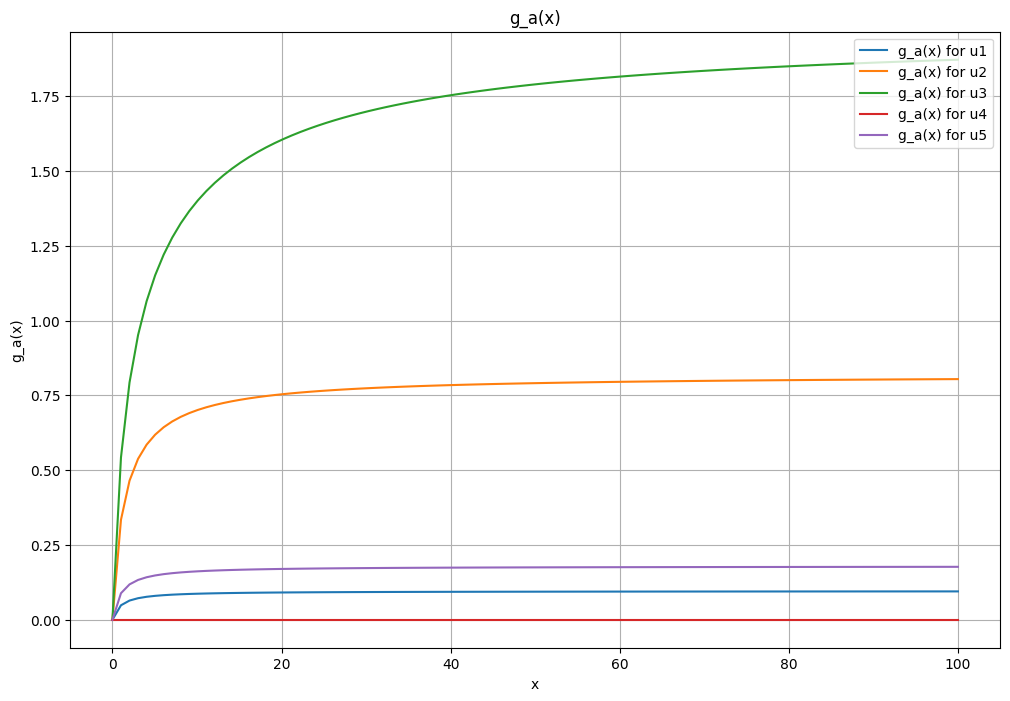

In [19]:
# g_a(x)の定義
def g_a(x, max_u, uk):
    alpha = 1 / (1 + x)
    return (1 + x) * I_alpha(alpha, max_u, uk)

x_values = np.linspace(0, 100, 100)
# g_a(x)の計算と図示
plt.figure(figsize=(12, 8))
for i in range(K):
    g_values = [g_a(x, max_u, u[i]) for x in x_values]
    plt.plot(x_values, g_values, label=f'g_a(x) for u{i+1}')
plt.xlabel('x')
plt.ylabel('g_a(x)')
plt.title('g_a(x)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

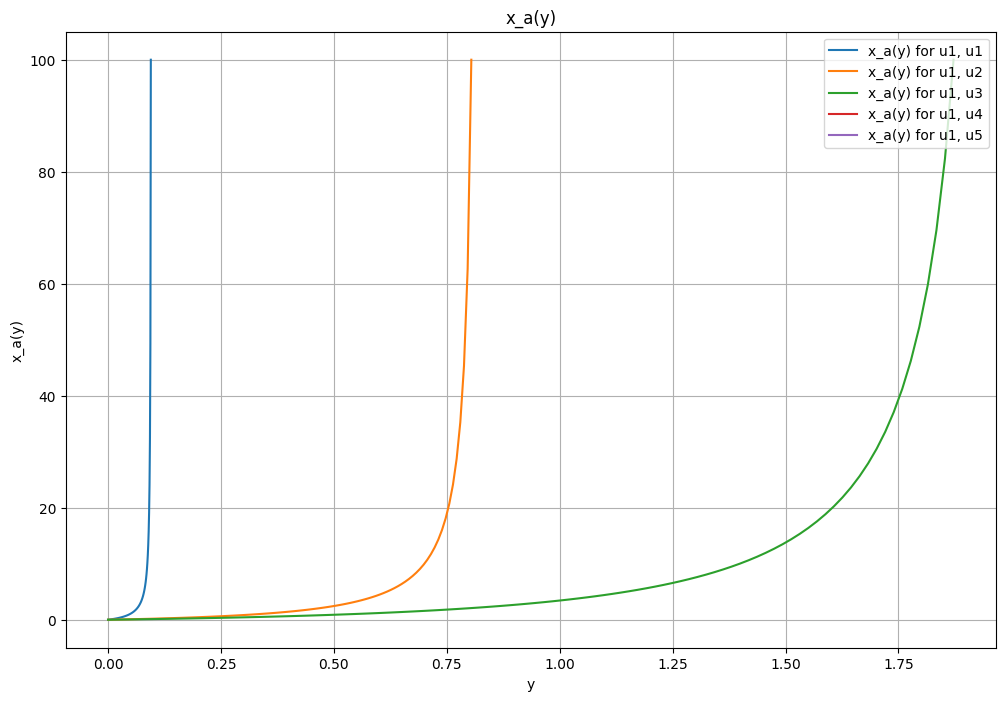

In [21]:
# x_a(y)の定義
def x_a(y, max_u, uk):
    if max_u != uk:
        def func(x):
            return g_a(x, max_u, uk) - y

        # 探索区間の終点を探す
        x = 1
        while func(x) <= 0:
            x = 2 * x

        # 初期の区間 [a, b] を調整して二分法
        try:
            result = bisection(func, 0, x, error=1e-10, max_loop=100)
        except ValueError:
            result = np.nan  # 二分法が失敗した場合は NaN を返します
        return result
    else:
        return 0
# x の値を生成
x_values = np.linspace(0, 100, 100)

# g_a(x)の値域を取得と yの範囲を設定
plt.figure(figsize=(12, 8))
for i in range(0, K):
      uk = u[i]
      g_values = np.array([g_a(x, max_u, uk) for x in x_values])
      y_min, y_max = np.min(g_values), np.max(g_values)
      y_values = np.linspace(0, y_max, 100)
      x_values = [x_a(y, max_u, uk) for y in y_values]
      plt.plot(y_values, x_values, label=f'x_a(y) for u1, u{i+1}')
plt.xlabel('y')
plt.ylabel('x_a(y)')
plt.title('x_a(y)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

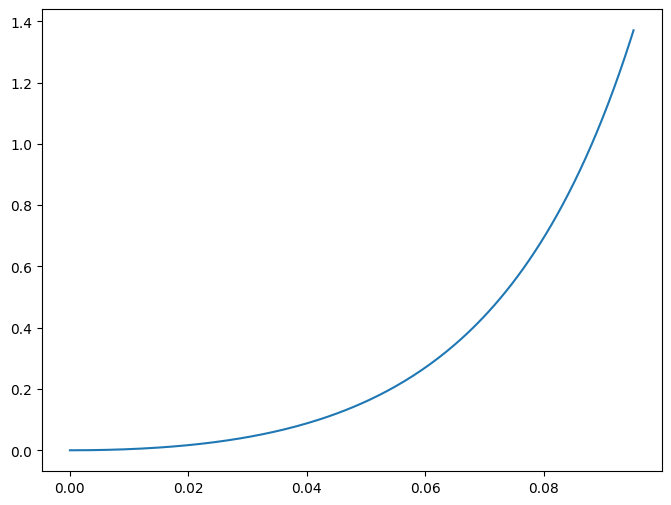

In [6]:
# F_u(y) の定義
def F_u(y, max_u, uk):
    sum_terms = 0
    for i in range(0, K):
        if max_u!=u[i]:
           uk = u[i]
           xa_y = x_a(y, max_u, u[i])
           child = kl_d(max_u, (max_u + xa_y * u[i]) / (1 + xa_y))
           mother = kl_d(u[i], (max_u + xa_y * u[i]) / (1 + xa_y))
           sum_terms += child / mother
        else:
           sum_terms = 0
    return sum_terms

# F_u(y)の図示}
y_values = np.linspace(0, kl_d(max_u, u_second), 200, endpoint=False)
F_values = [F_u(y,max_u , uk) for y in y_values]
plt.figure(figsize=(8, 6))
plt.plot(y_values, F_values, label="F_u(y)")

y*: 0.08810265961505245
F_u(y*) = 1.00000000015544


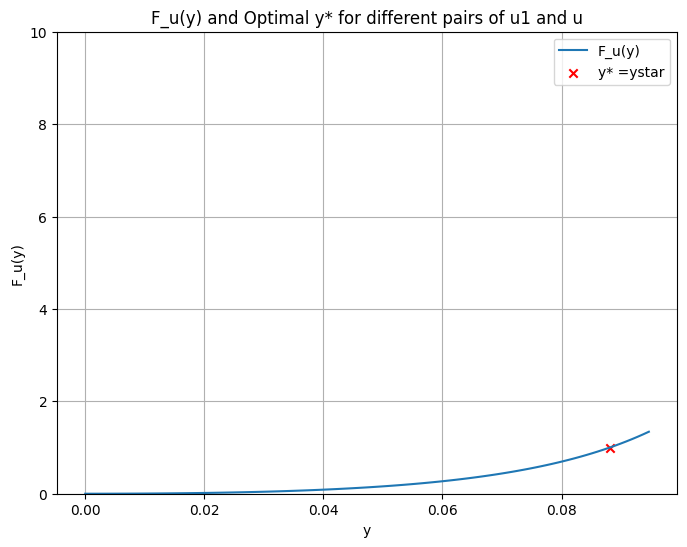

In [7]:


# F_u(y)の図示
y_values = np.linspace(0, kl_d(max_u, u_second),100, endpoint=False)
F_values = [F_u(y,max_u , uk) for y in y_values]
plt.figure(figsize=(8, 6))
plt.plot(y_values, F_values, label="F_u(y)")

# y* の計算
def y_star(max_u, u):
    def func1(y):
        return F_u(y, max_u, uk) - 1.0

    #探索区間の終点を探す
    x=max(0,kl_d(max_u, u_second)-1)
    while func1(x)<=0:
          x=(kl_d(max_u, u_second)+x)/2


    # 二分法でF_u(y)-1=0となるyを求める
    try:
        y_optimal = bisection(func1, 0,x, error=1e-10, max_loop=100)  # 誤差許容値を設定
        Fu_optimal = F_u(y_optimal, max_u, uk)
        print('y*:',y_optimal)
        print('F_u(y*) =' ,Fu_optimal)
        return y_optimal
    except ValueError:
        print("Optimal y* not found.")
        return np.nan

# y* を計算
ystar = y_star(max_u, u)
plt.scatter([ystar],F_u(ystar, max_u, uk) , color='red', label="y* =ystar", marker='x')
plt.title("F_u(y) and Optimal y* for different pairs of u1 and u")
plt.xlabel("y")
plt.ylabel("F_u(y)")
plt.legend()
plt.grid(True)
plt.ylim(0, 10)
plt.show()

In [8]:
#waの計算
def w_a(ystar, max_u, uk):
    mother = 0
    child=[]
    for i in range(0, K):
        if max_u!=u[i]:
          uk = u[i]
          xa_ystar = x_a(ystar, max_u, uk)
          if np.isnan(xa_ystar):
             continue
          child.append(xa_ystar)  # childにxa_ystarを格納
        else:
          uk=max_u
          child.append(1)
    return np.array(child)/ np.sum(child)

# u の各要素に対する w_a を計算して表示
for i in range(0, K):
    uk = u[i]
    result = w_a(ystar, max_u, uk)[i]
    print(f"w_a for u{i+1} =", result)

w_a for u1 = 0.838803786286203
w_a for u2 = 0.011491117713756684
w_a for u3 = 0.007173471396560323
w_a for u4 = 0.07135149072152407
w_a for u5 = 0.07118013388195588


In [9]:
#waの和
def wanosum(ystar,u1,uk):
    wa=[]
    for i in range(0, K):
        uk = u[i]
        result1 = w_a(ystar, max_u, u)[i]
        wa.append(result1)

    return np.sum(wa)

print("waの和",wanosum(ystar,max_u,uk))

waの和 0.9999999999999999


In [10]:
class Bandit:
   def __init__(self,arms=K):
       self.rates=np.random.rand(arms)#各マシンの勝率

   def play(self,arm):
       rate=self.rates[arm]#マシンarmの勝率
       if rate >np.random.rand():
          return 1
       else:
          return 0


class Dtracking:
    def __init__(self,action_size=K):
        self.Qs=np.zeros(action_size)#K個のarmの標本平均を入れる箱
        self.ns=np.zeros(action_size)#K個のarmの試行回数を入れる箱

    def update(self,action,reward):
        self.ns[action]+=1#プレイしたマシンの回数
        self.Qs[action]+=reward-self.Qs[action]/self.ns[action]#プレイしたマシンの標本平均

    def get_action(self):
        step = np.sum(self.ns) + 1
        max_u=max(self.Qs)
        for action in range(K):
            if self.ns[action] < (step)**(1/2) - K/2:
                return np.argmin(self.ns)
            else:
                u1 = self.Qs[0]
                uk = self.Qs[action]
                ystar = y_star(max_u, self.Qs)
                wa = w_a(ystar, max_u, self.Qs[action])
                return np.argmax(step * wa - self.ns)

<ipython-input-1-a822563b9be8>:51: RuntimeWarning: divide by zero encountered in log
  return max_u * np.log(max_u / uk) + (1 - max_u) * np.log((1 - max_u) / (1 - uk))
<ipython-input-1-a822563b9be8>:51: RuntimeWarning: invalid value encountered in scalar multiply
  return max_u * np.log(max_u / uk) + (1 - max_u) * np.log((1 - max_u) / (1 - uk))
<ipython-input-1-a822563b9be8>:51: RuntimeWarning: divide by zero encountered in scalar divide
  return max_u * np.log(max_u / uk) + (1 - max_u) * np.log((1 - max_u) / (1 - uk))
<ipython-input-2-7e851e6c3497>:4: RuntimeWarning: invalid value encountered in scalar multiply
  return alpha * kl_d(max_u, alpha * max_u + (1 - alpha) * uk) + (1 - alpha) * kl_d(uk, alpha * max_u + (1 - alpha) * uk)
<ipython-input-1-a822563b9be8>:51: RuntimeWarning: invalid value encountered in log
  return max_u * np.log(max_u / uk) + (1 - max_u) * np.log((1 - max_u) / (1 - uk))


y*: 0.0
F_u(y*) = nan
y*: 0.0
F_u(y*) = nan
y*: 0.0
F_u(y*) = nan
y*: 0.0
F_u(y*) = nan
y*: 0.0
F_u(y*) = nan
y*: 0.0
F_u(y*) = nan
y*: 0.0
F_u(y*) = nan
y*: 0.0
F_u(y*) = nan
y*: 0.0
F_u(y*) = nan
y*: 0.0
F_u(y*) = nan
y*: 0.0
F_u(y*) = nan
y*: 0.0
F_u(y*) = nan
y*: 0.0
F_u(y*) = nan
y*: 0.0
F_u(y*) = nan
y*: 0.0
F_u(y*) = nan
y*: 0.0
F_u(y*) = nan
y*: 0.0
F_u(y*) = nan
y*: 0.0
F_u(y*) = nan
y*: 0.0
F_u(y*) = nan
y*: 0.0
F_u(y*) = nan
y*: 0.0
F_u(y*) = nan
y*: 0.0
F_u(y*) = nan
y*: 0.0
F_u(y*) = nan
y*: 0.0
F_u(y*) = nan
y*: 0.0
F_u(y*) = nan
y*: 0.0
F_u(y*) = nan
y*: 0.0
F_u(y*) = nan
y*: 0.0
F_u(y*) = nan
y*: 0.0
F_u(y*) = nan
y*: 0.0
F_u(y*) = nan
y*: 0.0
F_u(y*) = nan
y*: 0.0
F_u(y*) = nan
y*: 0.0
F_u(y*) = nan
y*: 0.0
F_u(y*) = nan
y*: 0.0
F_u(y*) = nan
y*: 0.0
F_u(y*) = nan
y*: 0.0
F_u(y*) = nan
y*: 0.0
F_u(y*) = nan
y*: 0.0
F_u(y*) = nan
y*: 0.0
F_u(y*) = nan
y*: 0.0
F_u(y*) = nan
y*: 0.0
F_u(y*) = nan
y*: 0.0
F_u(y*) = nan
y*: 0.0
F_u(y*) = nan
y*: 0.0
F_u(y*) = nan
y*: 0.0
F_

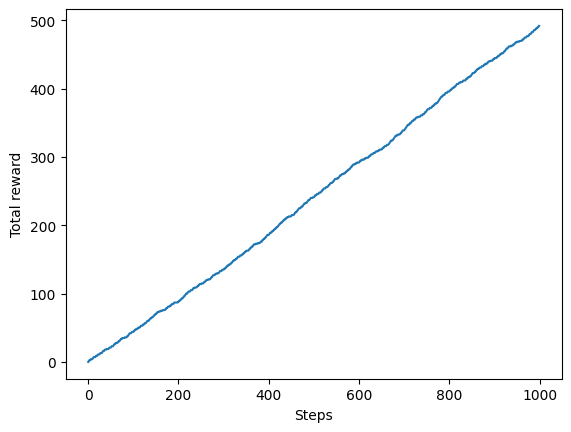

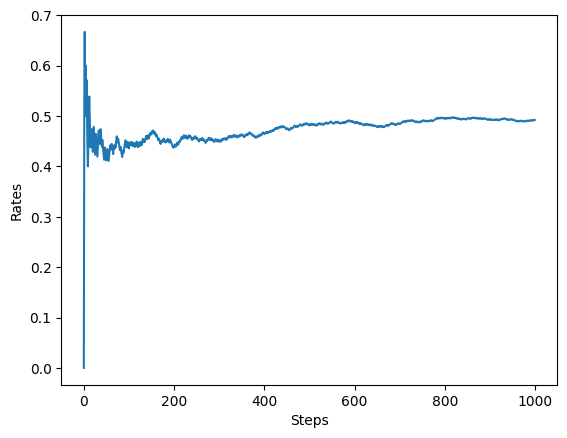

In [11]:
import matplotlib.pyplot as plt

steps=1000
arms=15

bandit=Bandit()
Dtrack=Dtracking()
total_reward=0
total_rewards=[]
rates=[]

for step in range(steps):
    action=Dtrack.get_action()
    reward=bandit.play(action)
    Dtrack.update(action,reward)
    total_reward+=reward

    total_rewards.append(total_reward)#マシンの標本平均の箱
    rates.append(total_reward/(step+1))#マシンの勝率の箱

print(total_rewards)
print(rates)
print("最適腕",np.argmax(total_reward))

plt.ylabel("Total reward")
plt.xlabel("Steps")
plt.plot(total_rewards)
plt.show()

plt.ylabel("Rates")
plt.xlabel("Steps")
plt.plot(rates)
plt.show()